In [1]:
import numpy as np
import matplotlib.pyplot as plt

#load data from file
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in xrange(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)
    return np.array(data)
#打印出数据集看看
data = load_data('ex1data1.txt')
print data.shape
print data[:5]

X = data[:,:-1]
y = data[:,-1:]
print X.shape
print y.shape
print X[:5]
print y[:5]
        

(97, 2)
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
(97, 1)
(97, 1)
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]
[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


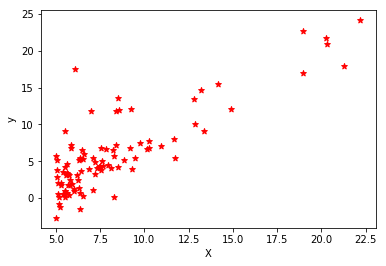

In [2]:
#plot data
#可视化一下数据集
plt.scatter(X, y, color = 'r',marker= '*')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [3]:
#compute the cost
num_train = X.shape[0]
one = np.ones((num_train,1))
X = np.hstack((one,data[:,:-1]))
W = np.zeros((2,1))
print X.shape
print X
print W

#定义cost函数，并测试
def compute_cost(X_test,y_test,theta):
    num_X = X_test.shape[0]
    cost = 0.5 * np.sum(np.square(X_test.dot(theta) - y_test)) / num_X
    return cost

cost_1 = compute_cost(X,y,W)
print 'cost = %f,with W = [0,0]'%(cost_1)
cost_2 = compute_cost(X,y,np.array([[-1],[2]]))
print 'cost = %f,with W = [-1,2]'%(cost_2)

(97, 2)
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1

In [4]:
#gradient descent
#定义梯度下降函数，更新参数theta。并测试
def gradient_descent(X_test,y_test,theta,alpha = 0.01,iters = 10000):
    J_history = []
    num_X = X_test.shape[0]
    for i in xrange(iters):
        theta = theta - alpha * X_test.T.dot(X_test.dot(theta) - y_test) / num_X
        cost = compute_cost(X_test,y_test,theta)
        J_history.append(cost)
    return theta,J_history

theta,J_history = gradient_descent(X,y,np.array([[0.001],[0.001]]))
print theta
print J_history[-1]

[[-3.89578082]
 [ 1.19303364]]
4.476971375975179


In [5]:
#predict 预测一下
predict1 = np.array([[1,3.5]]).dot(theta)
predict2 = np.array([[1,7]]).dot(theta)
print predict1*10000,predict2*10000

[[2798.36913995]] [[44554.54648245]]


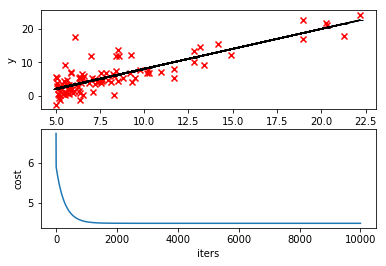

In [6]:
#plot the result 可视化回归曲线
plt.subplot(211)
plt.scatter(X[:,1],y,color = 'r',marker = 'x')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X[:,1],X.dot(theta),color = 'black',marker='_')
#可视化cost变化曲线
plt.subplot(212)
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')
plt.show()

In [ ]:
#可视化一下3d图像，因为J与theta0和theta1两个参数有关
#Visualizing J(theta_0, theta_1)
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

size = 100
theta0Vals = np.linspace(-10,10, size)
theta1Vals = np.linspace(-1, 4, size)
JVals = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        col = np.array([[theta0Vals[i]], [theta1Vals[j]]]).reshape(-1,1)
        JVals[i,j] = compute_cost(X,y,col)

theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
JVals = JVals.T
print JVals.shape,JVals[0,0],JVals[1,1] #test correct

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta0Vals, theta1Vals, JVals)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

(100, 100) 328.0929055495073 311.92025944831784


In [ ]:
#绘制轮廓曲线,因为J与theta0和theta1两个参数有关
contourFig = plt.figure()
ax = contourFig.add_subplot(111)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

CS = ax.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,20))
plt.clabel(CS, inline=1, fontsize=10)

# 绘制最优解
ax.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)
plt.show()
